In [1]:
# --- Monte Carlo Method ---
n <- 1e4 # 샘플 개수
r <- 1 # 목표 원 크기

[1] 3.148

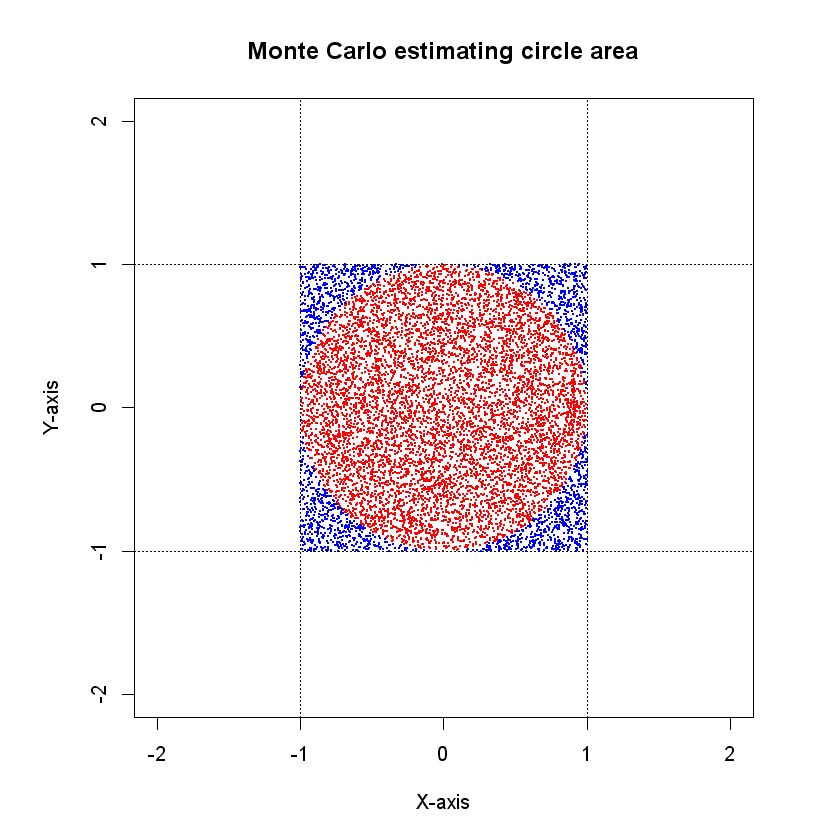

In [2]:
carculate_area <- function(n, r){
  x <- runif(n,-r,r) # x좌표
  y <- runif(n,-r,r) # y좌표
  # 원의 반경 안에 들면 accept / reject할 condition을 설정해주자!                                                                                                                                                                           cond <- x^2 + y^2 <= r^2
    cond <- x^2 + y^2  < r^2
  # 원의 넓이 = 정사각형 넓이 * 원 내부에 위치한 점의 개수 / 모든 점의 개수                                                                                                                                                             area <- (2*r)^2 * length(x[cond]) / n
    area <- (2*r)^2 * length(x[cond]) / n
  
  # 시각화
  par(pty='s') # 창 크기 비율 1:1로
  plot(x[cond], y[cond], pch=20, cex=0.1, xlim=c(-r-1,r+1), ylim=c(-r-1,r+1), col='red',
       xlab='X-axis', ylab='Y-axis', main='Monte Carlo estimating circle area')
  par(new=T)
  plot(x[!cond], y[!cond], pch=20, cex=0.1, xlim=c(-r-1,r+1), ylim=c(-r-1,r+1), col='blue',
       xlab='X-axis', ylab='Y-axis', main='Monte Carlo estimating circle area')
  abline(h=c(-r, r), v=c(-r, r), lty='dotted')
  
  return(area)
}

carculate_area(n, r=1)

In [3]:
# --- Metropolis Hastings ---
# Using normal proposal

metroNormal=function(N,b,init){
  x<-rep(init,N)
  for (i in 2:N){
    # 제안분포 정하고 거기서 Y=y 하나 뽑기                                                                                                                                                                                                    y<-runif(1,x[i-1]-1,x[i-1]+1)
    y <- runif(1, x[i-1]-1, x[i-1]+1)
    # Acceptance Probability 정의해주기!                                                                                                                                                                                                     alpha<-exp((x[i-1]^2 - y^2)/2)
    alpha <- min(1,exp((x[i-1]^2 - y^2)/2))
    u<-runif(1) # Unif(0, 1)에서 비교 대상으로 사용할 변수 추출
    if (u<alpha) 
        x[i] <- y
    else 
        x[i] <- x[i-1]
  }
  return(x)
}

res1=metroNormal(2*10^3,1,-10)

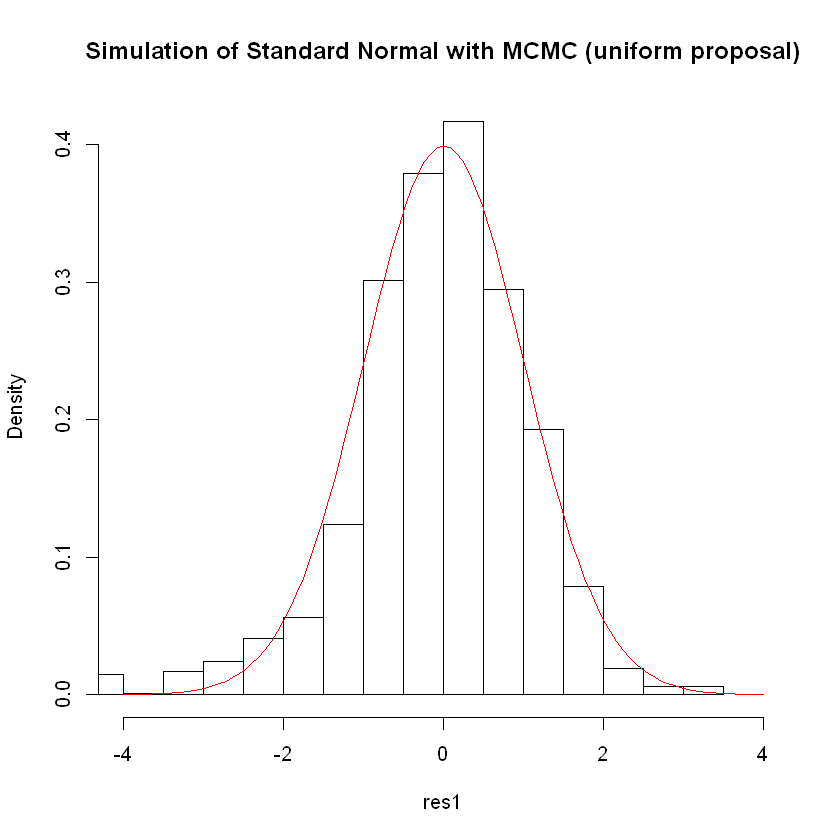

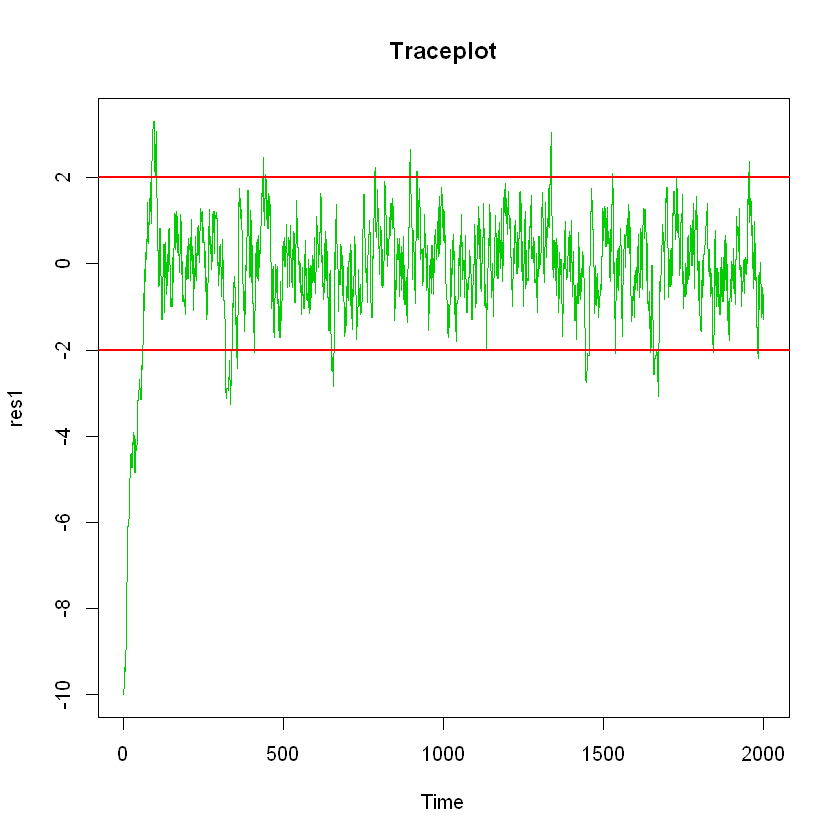

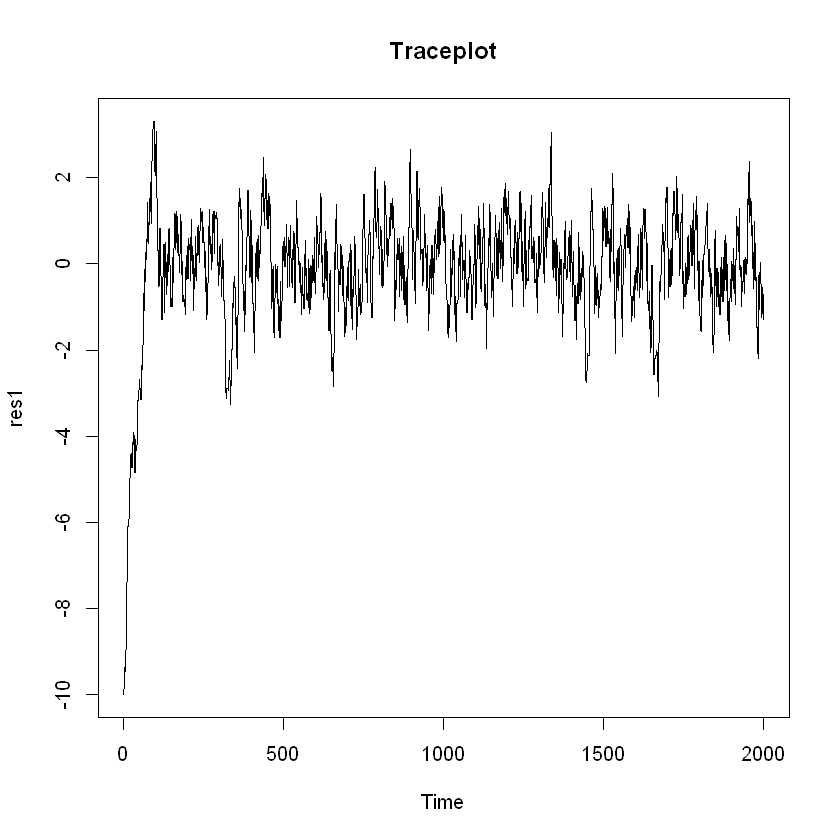

In [4]:
hist(res1,nclass=20,main="Simulation of Standard Normal with MCMC (uniform proposal)",prob=T,xlim=c(-4,4))
curve(dnorm(x),-4,4,add=T, col='red')

ts.plot(res1,col=3, main = "Traceplot")
# 정규분포의 특성상 대부분의 데이터가 -2 ~ 2 사이에 위치해 있어야 한다. 그걸 확인하기 위해 빨간 선분 그어주기!
# 인수 : (직선을 그을 x좌표 or y좌표, 0이면 가로선 or 1이면 세로선, lwd=..., col=...)
abline(2,0,lwd=2,col=2);abline(-2,0,lwd=2,col=2) 
plot(res1, main = "Traceplot", xlab='Time', type="l") # ts.plot과 같은 역할

In [5]:
# --- Gibbs Sampling ---

if(!require(mnormt)) install.packages("mnormt"); library(mnormt)

Loading required package: mnormt


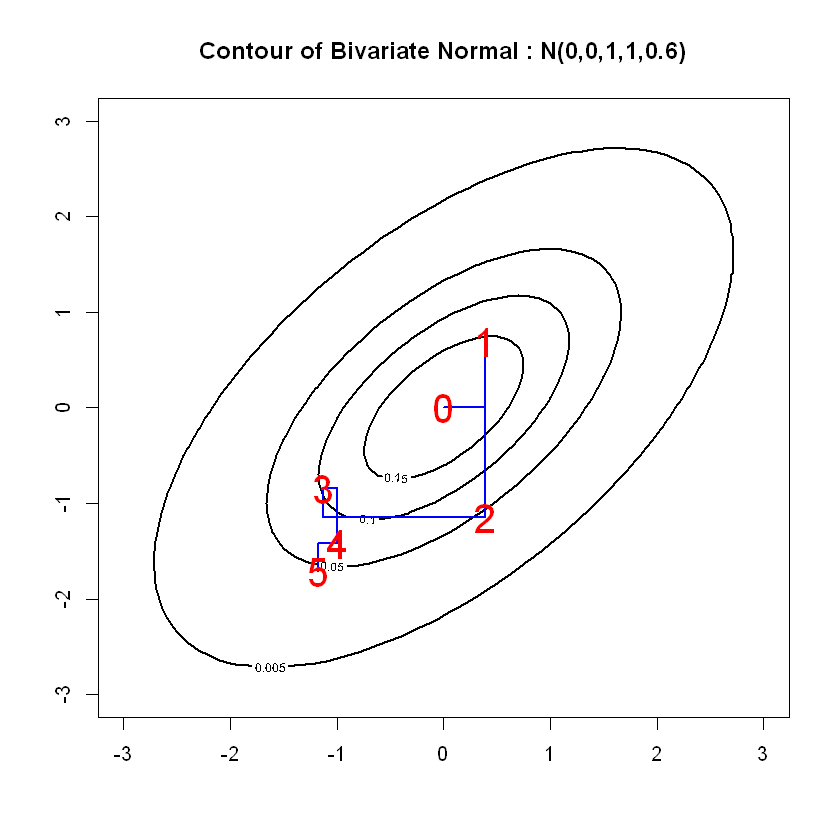

In [6]:
Sig=matrix(c(1,0.6,0.6,1),2,2)  # 분산 행렬 정의해주기
x1=seq(-3,3,0.1)                 #############################################
x2=seq(-3,3,0.1)                 # 비교를 위해 실제 다변량 정규분포에서 추출 #
n=length(x1)                     #############################################
z=matrix(0,n,n)

for (i in 1:n){
  z[i,]=dmnorm(cbind(x1[i],x2),c(0,0),Sig)
}
contour(x1,x2,z,levels=c(0.005,0.05,0.1,0.15),lwd=2,main="Contour of Bivariate Normal : N(0,0,1,1,0.6)")

# Using Gibbs sampler

Nsim=6
x1=numeric(Nsim)
x2=numeric(Nsim)
for (i in 2:Nsim){
  x1[i]=rnorm(1,0.6*x2[i-1],sqrt(0.64))
  x2[i]=rnorm(1,0.6*x1[i],sqrt(0.64))
}

for (i in 1:Nsim){
  segments(x1[i],x2[i],x1[i+1],x2[i],lwd=2,col="blue")
  segments(x1[i+1],x2[i],x1[i+1],x2[i+1],lwd=2,col="blue")
}

text(x1[1],x2[1],"0",cex=2,col="red")
text(x1[2],x2[2],"1",cex=2,col="red")
text(x1[3],x2[3],"2",cex=2,col="red")
text(x1[4],x2[4],"3",cex=2,col="red")
text(x1[5],x2[5],"4",cex=2,col="red")
text(x1[6],x2[6],"5",cex=2,col="red")

In [8]:
Nsim=101
x1=numeric(Nsim)
x2=numeric(Nsim)
for (i in 2:Nsim){
  x1[i]=rnorm(1,0.6* x2[i-1] ,sqrt(0.64))
  x2[i]=rnorm(1,0.6* x1[i]   ,sqrt(0.64))
}

for (i in 1:Nsim){
  segments(x1[i],x2[i],x1[i+1],x2[i],lwd=2,col="blue")
  segments(x1[i+1],x2[i],x1[i+1],x2[i+1],lwd=2,col="blue")
}

ERROR: Error in segments(x1[i], x2[i], x1[i + 1], x2[i], lwd = 2, col = "blue"): plot.new has not been called yet


In [7]:
Nsim=10001
x1=numeric(Nsim)
x2=numeric(Nsim)

for (i in 2:Nsim){
  x1[i]=rnorm(1,0.6*       x2[i-1]    ,sqrt(0.64))
  x2[i]=rnorm(1,0.6*       x1[i]    ,sqrt(0.64))
}
points(x1,x2,pch=20,col="green")

library(MASS)
contour(kde2d(x1, x2, lims= c(-3,3,-3,3)), xlab='x1', ylab='x2',main='Estimated Kernel Density')

ERROR: Error in segments(x1[i], x2[i], x1[i + 1], x2[i], lwd = 2, col = "blue"): plot.new has not been called yet
